# Mandatory Assignment 2
## Submission Deadline: 15th February, 2022

#### Reinforcement Learning and DecisionMaking Under Uncertainty IN-STK 5100/9100, Spring 2022, UiO
#### A. George, 1st February, 2022

## Description:
In this exercise, we will calculate best actions according to:\
the maximum likelihood model, a posteriory model, and the Bayes decision rule. \
Remember to **only fill in the marked gaps** and do not modify any other bits of code!\
There are test instances provided at the end with whih you can **verify that your code is running correctly**.

Let's start!

#### Some Notation:
- $\mathcal{A}$ action space
- $\mathcal{S}$ state space
- $U(a,s)$ utility of an action-state pair $(a,s)$
- $P = \{P_\omega : \omega \in \Omega\}$ model family with parameters $\Omega$
- $P_\omega(s)$ probability of state $s$ under model $P_\omega$
- $\xi(\omega)$ probability of model $P_\omega$ being the correct model of the world according to belive $\xi$
- $x$ observed data

In [59]:
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(2022)

## 1) Maximum Likelihood Approach

#### 1. Find the maximum likelihood model $\omega_{ml}(x)=argmax_{\omega \in \Omega} P_\omega(x)$, given
- **P**: P[i][j] is the probability the i-th model assigns to the j-th state
- **observations**: array of observed data (i.e., observed states)

In [60]:
def get_ML_model(P, observations):
    n_models = np.shape(P)[0]
    if len(observations) == 0:                       # if there are no observations yet, then choose a random model
        ML_model = random.randint(0,n_models-1)
    else: 
        observations_probability = np.ones(n_models) # pobability of the observations occuring under the different models
        ### FILL IN THE GAP HERE:
        #   - compute the observations probailities under different models
        #   - find the maximum likelihood model
        for i in range(n_models):
            for j in observations:
                observations_probability[i] *= P[i][j]
        ML_model = np.argmax(observations_probability)
    
    return ML_model

#### 2. Calculate the expected utility of a fixed action w.r.t. the maximum likelihood model $\omega_{ml}(x)$ given some observations $x$: $\mathbb{E}_{s\sim P_{\omega_{ml}}}[U(action,s)] = \sum_{s \in \mathcal{S}} P_{\omega_{ml}}(s)\cdot U(action,s)$, given
- **P**: P[i][j] is the probability the i-th model assigns to the j-th state
- **action**: some action
- **U[action,state]**: the utility of the action/state pair
- **observations**: array of observed data (i.e., observed states)

In [61]:
def get_ML_utility(P, action, U, observations):
    n_models = np.shape(P)[0]
    n_states = np.shape(P)[1]
    utility = 0 ## FILL IN
    ML_model = get_ML_model(P, observations) # get the model under which the observations are most likely
    ### FILL IN THE GAP HERE:
    #   - compute the expected utility of action under ML_model
    for i in observations:
        utility += U(action,i) * P[ML_model][i]

    return utility

#### 3. Find the best action according to the maximum likelihood model, given
- **P**: P[i][j] is the probability the i-th model assignsm to the j-th state
- **U[action,state]**: the utility of the action/state pair
- **observations**: array of observed data (i.e., observed states)

In [62]:
def get_best_action_ML(P, U, observations):
    n_actions = np.shape(P)[1]
    ### FILL IN THE GAP HERE:
    #   - find the action that has the maximum expected utility under ML_model
    #   - return this action
    E_utility = np.zeros(n_actions)
    for i in range(n_actions):
        E_utility[i] = get_ML_utility(P, i, U, observations)

    a_max = np.argmax(E_utility)
    
    return a_max

## 2) Posterior Distribution

#### 1. Calculate the posterior $\xi(.| x)$ with $\xi(\omega | x)=\frac{P_\omega(x)\cdot \xi(\omega)}{\sum_{\omega'\in\Omega}P_{\omega'}(x)\cdot\xi(\omega')}$ of a prior belief function $\xi$ over model family $P = \{P_\omega : \omega \in \Omega\}$ when given observations $x$
- **prior**:   belief vector so that prior[i] is the probabiltiy of model i being correct
- **P**:       P[i][j] is the probability the i-th model assigns to the j-th state
- **observations**: array of observed data (i.e., observed states)

In [63]:
def get_posterior(prior, P, observations):
    n_models = len(prior)
    ### FILL IN THE GAP HERE:
    #   - compute the posterior distributuion under the observations
    #   - Hint: compute first an array with entries 
    #           prior[i]*P[i][x_1]*...*P[i][x_n]  
    #           for observations = x_1 ... x_n
    #   - return the posterior
    model_prob = np.copy(prior)
    for i in range(n_models):
        for j in observations:
            model_prob[i] *= P[i,j]

    posterior_dist = model_prob/np.sum(model_prob)
    return posterior_dist

## 3) Maximum A Posteriori Approach

#### 1. Find the maximum a posteriori model $\omega_{map}(x)=argmax_{\omega \in \Omega} \xi(\omega | x)$ and calculate the expected utility of a fixed action w.r.t. $\omega_{map}$: $\mathbb{E}_{s\sim P_{\omega_{map}}}[U(action,s)] = \sum_{s \in \mathcal{S}} P_{\omega_{map}}(s)\cdot U(action,s)$
- **belief**:   belief vector so that belief[i] is the probabiltiy of model i being correct
- **P**: P[i][j] is the probability the i-th model assigns to the j-th state
- **action**: some action
- **U[action,state]**: the utility of the action/state pair
- **observations**: array of observed data (i.e., observed states)

In [64]:
def get_MAP_utility(belief, P, action, U, observations):
    n_models = len(belief)
    n_states = np.shape(P)[1]
    utility = 0 
    ### FILL IN THE GAP HERE:
    #   - find the maximum a posteriori model
    #   - compute the expected utility of action under ML_model
    #   - return the expected utility
    MAP = np.argmax(get_posterior(belief, P, observations))
    for prob in P[MAP]:
        utility += prob*U(action, MAP)
    

    return utility

#### 2. Find the best action according to the maximum a posteriori model, given
- **belief**:   belief vector so that belief[i] is the probabiltiy of model i being correct
- **P**: P[i][j] is the probability the i-th model assignsm to the j-th state
- **U[action,state]**: the utility of the action/state pair
- **observations**: array of observed data (i.e., observed states)

In [65]:
def get_best_action_MAP(belief, P, U, observations):
    n_actions = np.shape(P)[1]
    ### FILL IN THE GAP HERE:
    #   - find the action that has the maximum expected utility under ML_model
    #   - return this action
    V = np.zeros(n_actions)
    for action in range(n_actions):
        V[action] = get_MAP_utility(belief, P, action, U, observations)
    return V.argmax()

## 4) Bayes rule

#### 1. Calculate the expected probability of a state given the current believe $\xi$ over models: $\mathbb{E}_{\omega \sim \xi}[P_\omega(state)]=\sum_{\omega \in \Omega} \xi(\omega)P_\omega(state)$
- **belief**: vector so that belief[i] is the probabiltiy of mdoel i being correct
- **P**: P[i][j] is the probability the i-th model assignsm to the j-th state
- **state**: some fixed state

In [66]:
def get_marginal_prediction(belief, P, state):
    n_models = len(belief)
    state_probability = 0
    ### FILL IN THE GAP HERE:
    #   - compute the expected probability of state according to belief
    for i in range(n_models):
        state_probability += belief[i] * P[i][state]

    return state_probability

#### 2. Calculate the expected utility of a specific action given the current believe $\xi$ over models: $\sum_{state \in \mathcal{S}} U(action,state)\mathbb{E}_{\omega \sim \xi}[P_\omega(state)]$
- **belief**: vector so that belief[i] is the probabiltiy of mdoel i being correct
- **P**: P[i][j] is the probability the i-th model assignsm to the j-th state
- **action**: some action
- **U[action,state]**: the utility of the action/state pair

In [67]:
def get_expected_utility(belief, P, action, U):
    n_models = len(belief)
    n_states = np.shape(P)[1]
    utility = 0 ## FILL IN
    for s in range(n_states):
        utility += get_marginal_prediction(belief, P, s) * U(action,s)
    return utility

#### 3. Find the best action according to Bayes rule $argmax_{a \in \mathcal{A}} \sum_{state \in \mathcal{S}} U(action,state)\mathbb{E}_{\omega \sim \xi(.|observations)}[P_\omega(state)]$, given
- **belief**:   belief vector so that belief[i] is the probabiltiy of model i being correct
- **P**: P[i][j] is the probability the i-th model assignsm to the j-th state
- **U[action,state]**: the utility of the action/state pair
- **observations**: array of observed data (i.e., observed states)

In [68]:
def get_best_action_Bayes(belief, P, U, observations):
    n_models = len(belief)
    n_actions = np.shape(P)[1]
    posterior = get_posterior(belief, P, observations)
    ### FILL IN THE GAP HERE:
    #   - find the action that has the maximum expected utility under the posterior belief
    #   - return this action
    E_utility = np.zeros(n_actions)
    for i in range(n_actions):
        E_utility[i] = get_expected_utility(belief, P, i, U)

    
    return np.argmax(E_utility)

## 5) Evaluation

#### Predicting the outcome of a coin toss of a coin with unknown bias

Our states in this example are the possible outcomes of a coin toss (heads/tails)

In [69]:
n_states = 2       # 0 = Tails, 1 = Head

Our actions are to make a prediction what the next state will be (heads/tails).\
If we are predicting the state correctly, we receive a utility of 1, otherwise a utility of 0.

In [70]:
def U1(action, state):
    return 1 if action == state else 0

Let's consider a model family $P$ of Bernoulli models over the states with parameters $\{0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9\}$

In [71]:
n_models = 10      # number of (Bernoulli) models in the model family
P = np.zeros((n_models,n_states))
for i in range(n_models):  # the i-th model shall be Bernoulli(i/10)
    P[i][1] = i/10       # the probability of throwing heads under the i-th model 
    P[i][0] = 1.0 - i/10 # the probability of throwing tails under the i-th model 

Let's say that, because we don't know anything about the bias of the coin, our initial belief is that every one of the models is equally likely.

In [72]:
belief = np.ones(n_models) / n_models

We sequentially make a prediction and then observe a coin toss. Suppose the real (but unknown!) bias of the coin is 0.3.  
Feel free to change the true model to test your code!

In [73]:
true_model = 3  # remember: model 4 corresponds to a bias of 0.3 for the coin

Based on our belief over the model family and our prior observations, we want to make a good next prediction. 
We can try out the maximum likelihood, maximum a posteriori and Bayesian approach and evaluate them in the following two experiments.

##### EXPERIMENT 1
Let's first consider one experiment in which we in particular consider the **chosen models** and the **developement of the belief function** for a number of observations.  
Feel free to change the number of observations to test your code!

In [74]:
### GENERATE OBSERVATIONS ###
n_observations = 200 # number of observed coin tosses with biased coin (unknown bias)
observations = np.random.binomial(size=n_observations, n=1, p= P[true_model][1])

### INITIALISING ###
# the chosen maximum likelihood models (up to tie breaking)
ML_model = np.zeros(n_observations)

# the chosen maximum a posteriori models (up to tie breaking)
MAP_model = np.zeros(n_observations)

# the belief distributions
updated_belief = np.zeros((n_observations,n_models))

Observations:
 [0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1
 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0]


Text(0,0.5,'probability according to belief')

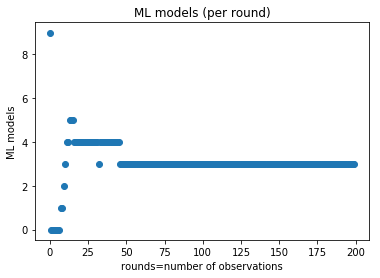

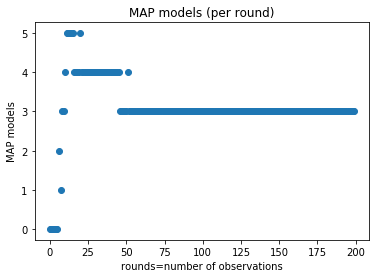

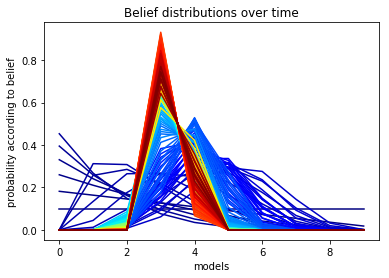

In [75]:
### EXPERIMENT 1 ###
for i in range(n_observations):
    # Computing ML outcomes
    ML_model[i] = get_ML_model(P, observations[0:i])
        
    # Computing the posterior belief based on the previous belief and the new observation
    if i == 0:
        updated_belief[i][:] = belief[:]
    else:
        updated_belief[i][:] = get_posterior(updated_belief[i-1,:], P, [observations[i]])
        
    # Computing MAP outcomes
    MAP_model[i] = updated_belief[i].argmax()
    

### PLOT RESULTS ###
print('Observations:\n',observations)

rounds = np.arange(n_observations)
fig1, ax1 = plt.subplots()
ax1.scatter(rounds, ML_model)
ax1.set_title("ML models (per round)")
ax1.set_xlabel("rounds=number of observations")
ax1.set_ylabel("ML models")

fig2, ax2 = plt.subplots()
ax2.scatter(rounds, MAP_model)
ax2.set_title("MAP models (per round)")
ax2.set_xlabel("rounds=number of observations")
ax2.set_ylabel("MAP models")

# print('Belief distributions: \n',np.around(updated_belief, decimals=2))
models = np.arange(n_models)
colors = plt.cm.jet(np.linspace(0,1,n_observations))
fig3, ax3 = plt.subplots()
for i in range(n_observations):
    ax3.plot(models, updated_belief[i], color=colors[i])
ax3.set_title("Belief distributions over time")
ax3.set_xlabel("models")
ax3.set_ylabel("probability according to belief")


##### EXPERIMENT 2
Let us now consider how much utility the models yield in average, i.e., how often the predictions are correct. Since observations are random, we average the cummulative utility over several runs.  
Feel free to change the number of observations and runs to test your code!

In [76]:
### INITIALISING ###
n_runs = 100
n_observations = 100

# the average utility (i.e., the number of successful predictions) achieved in a round=*index* given by the thee methods
utility_ML = np.zeros(n_observations)
utility_MAP = np.zeros(n_observations)
utility_Bayes = np.zeros(n_observations)

# the belief distributions
updated_belief = np.zeros((n_observations,n_models))

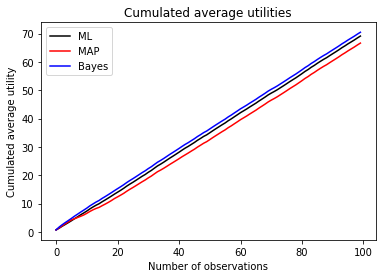

In [77]:
### EXPERIMENT 2 ###
for r in range(n_runs):
    # Generate observations for this run
    observations = np.random.binomial(size=n_observations, n=1, p= P[true_model][1])
    
    for i in range(n_observations):
        # Computing ML outcomes
        ML_action = get_best_action_ML(P, U1, observations[0:i])
        utility_ML[i] += U1(ML_action,observations[i])
        
        # Computing the posterior belief
        if i == 0:
            updated_belief[i][:] = belief[:]
        else:
            updated_belief[i][:] = get_posterior(updated_belief[i-1,:], P, [observations[i]])

        # Computing MAP outcomes
        MAP_action = get_best_action_MAP(updated_belief[i], P, U1, [observations[i]])
        utility_MAP[i] += U1(MAP_action,observations[i])

        # Computing Bayes outcomes
        Bayes_action = get_best_action_Bayes(updated_belief[i], P, U1, [observations[i]])
        utility_Bayes[i] += U1(Bayes_action,observations[i])
        
def cumulative(mylist):
    length = len(mylist)
    cumulative = np.zeros(length)
    cumulative[0] = mylist[0]
    for i in range(1,length):
        cumulative[i] = cumulative[i-1] + mylist[i]
    return cumulative

# computing the average cumulative utilities
utility_ML = utility_ML/n_runs
cumulative_utility_ML = cumulative(utility_ML)
    
utility_MAP = utility_MAP/n_runs
cumulative_utility_MAP = cumulative(utility_MAP)
    
utility_Bayes = utility_Bayes/n_runs
cumulative_utility_Bayes = cumulative(utility_Bayes)

### Plot RESULTS ###
rounds = np.arange(n_observations)

fig1, ax1 = plt.subplots()
ax1.plot(rounds, cumulative_utility_ML,color='k', label='ML')
ax1.plot(rounds, cumulative_utility_MAP,color='r', label='MAP')
ax1.plot(rounds, cumulative_utility_Bayes,color='b', label='Bayes')
ax1.set_title("Cumulated average utilities")
ax1.set_xlabel("Number of observations")
ax1.set_ylabel("Cumulated average utility")
plt.legend()

### Interpret your result:
How do you interpret the behaviour observed in Experiment 1 & 2? Write three observations that you can make.

- Observation 1: The first two plots shows which models the ML and MAP method chooses. This is based on the observations, which is why they both choose model 1 in the beginning. This is supported when looking at the six first observations, where all of them are 0. Looking at the belief distribution of time plot, we can also observe this. The blue lines are the first observations, while the red are the last. For model 0, we see six blue lines, with increasing probability of it being the correct model.
<br></p>
- Observation 2: As the number of observations increases, the methods are more and more certain of which model is correct. From about observation 50 and onwards, both ML and MAP only chooses model 3, which is the correct one. The belief distribution over time also shows this, with the peak increasing on model 3 as the number of observations increases.
<br></p>
- Observation 3: The cumulative average utility is as expected. The model will always make the action that is the most probable according to the model. This means that after the first observations, where the model will do different actions , it will after a while only do the same action, which in this case action 0. As the true model gives 1 30% of the time and 0 70% of the time, the model will do the correct action about 70% of the time. Looking at the plot that shows average cumulated utility, we see that after 100 observations, the utility is about 70.